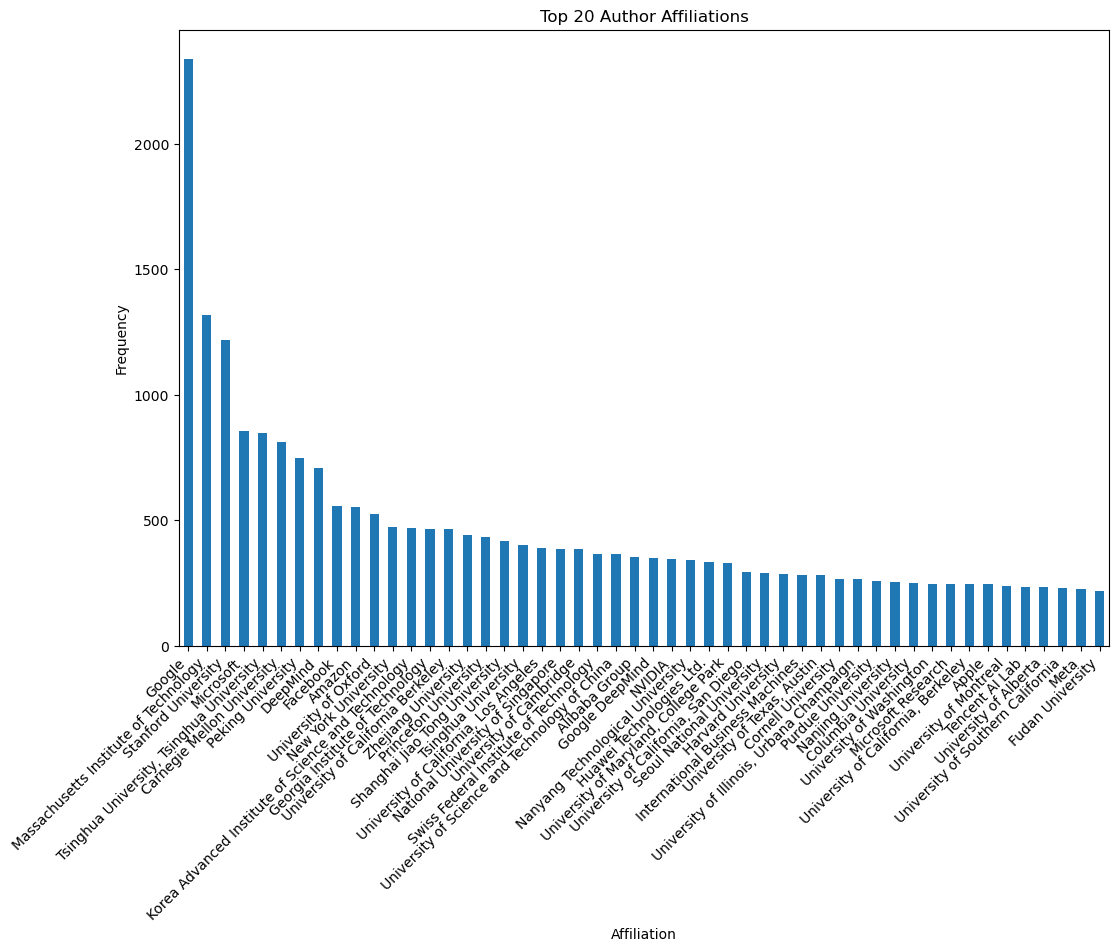

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the author dataset
authors_df = pd.read_csv('./dataset/gathered_author.csv')

# Count the frequency of each affiliation and get top 20
top_affiliations = authors_df['author_affiliation'].value_counts().head(50)

# Plotting the distribution of top 20 author affiliations
plt.figure(figsize=(12, 8))
top_affiliations.plot(kind='bar')
plt.title('Top 20 Author Affiliations')
plt.xlabel('Affiliation')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


* 학계 top-20, 기업 top-20 에 해당하는 authors만 남기기 

In [4]:
print('Before processing : ',len(authors_df))

# Filter authors by affiliation type 0 and get top 20 affiliations
top_20_affiliations_type_0 = authors_df[authors_df['author_affiliation_type'] == 0]['author_affiliation'].value_counts().head(20).index

# Filter authors by affiliation type 1 and get top 20 affiliations
top_20_affiliations_type_1 = authors_df[authors_df['author_affiliation_type'] == 1]['author_affiliation'].value_counts().head(20).index

# Combine the top 20 affiliations for both types
combined_top_affiliations = top_20_affiliations_type_0.union(top_20_affiliations_type_1)

# Filter the authors to only include those whose affiliation is in the combined top 20 for both types
filtered_authors_top_20_df = authors_df[authors_df['author_affiliation'].isin(combined_top_affiliations)]

# Display the first few rows of the filtered dataframe
filtered_authors_top_20_df.head()
print('After processing : ', len(filtered_authors_top_20_df))


Before processing :  54819
After processing :  19846


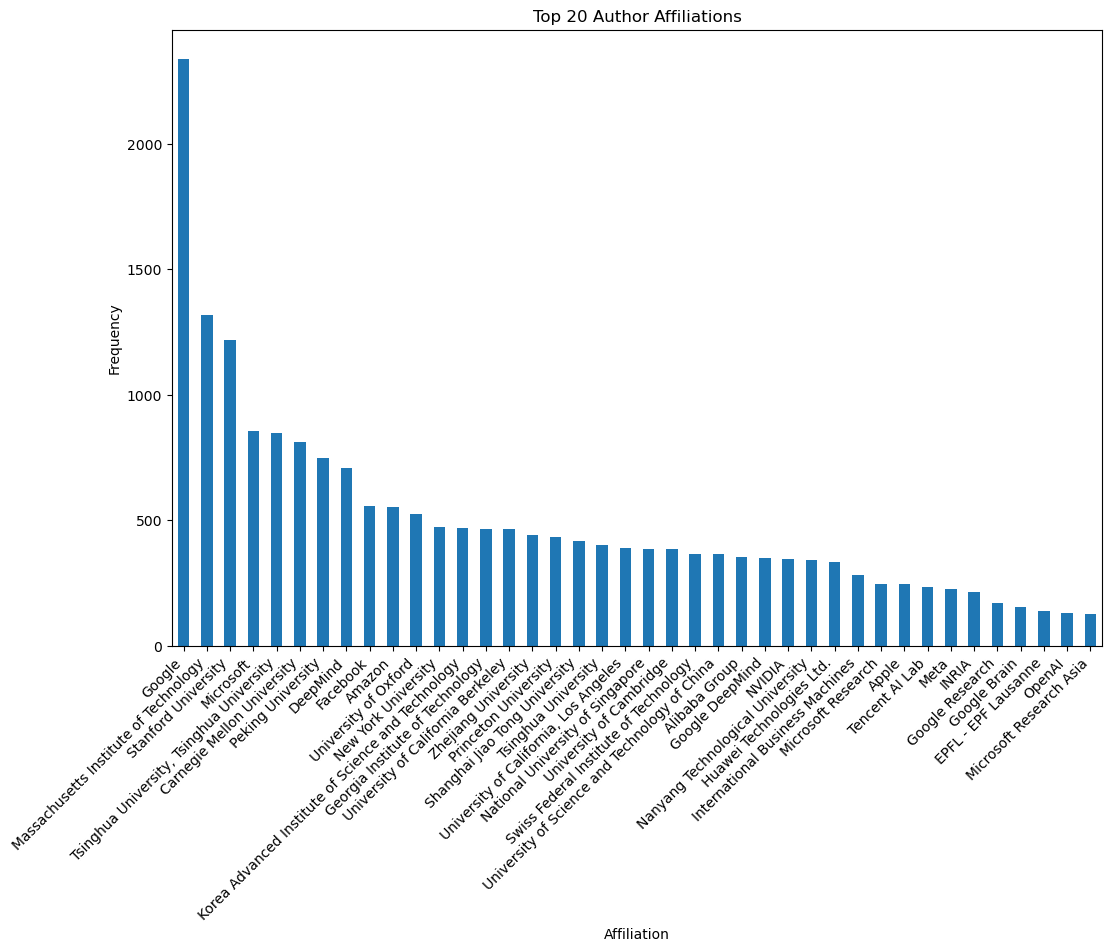

In [8]:
# Plotting the distribution of top 20 author affiliations
# top_affiliations = authors_df['author_affiliation'].value_counts().head(50)
vis_filtered_authors = filtered_authors_top_20_df['author_affiliation'].value_counts()
plt.figure(figsize=(12, 8))
vis_filtered_authors.plot(kind='bar')
plt.title('Top 20 Author Affiliations')
plt.xlabel('Affiliation')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [9]:
filtered_authors_top_20_df.head()


,author_id,author_name,author_position,author_affiliation,author_affiliation_type,paper_id
3,~Woojun_Kim1,Woojun Kim,Postdoc,Carnegie Mellon University,1,zzL_5WoI3I
4,~Youngchul_Sung1,Youngchul Sung,Full Professor,Korea Advanced Institute of Science and Techno...,1,zzL_5WoI3I
9,~Adil_Salim2,Adil Salim,Researcher,Microsoft,0,zyLVMgsZ0U_
11,~Jerry_Li1,Jerry Li,Senior Researcher,Microsoft,0,zyLVMgsZ0U_
13,~Sitan_Chen1,Sitan Chen,Postdoc,University of California Berkeley,1,zyLVMgsZ0U_


이제 top_20_df에 없는 paper_id를 가지고 있는 paper들을 gathered_paper.csv에서 지울 예정.

In [10]:
# Load the paper dataset
papers_df = pd.read_csv('./dataset/gathered_paper.csv')
print("Before processing : ", len(papers_df))

# Get the unique paper IDs from the filtered authors dataset
unique_paper_ids = filtered_authors_top_20_df['paper_id'].unique()

# Filter the papers to only include those whose paper IDs are in the filtered authors dataset
filtered_papers_df = papers_df[papers_df['paper_id'].isin(unique_paper_ids)]

# Display the first few rows of the filtered papers dataframe
# filtered_papers_df.head()
print("After processing : ", len(filtered_papers_df))



Before processing :  12873
After processing :  7557


처리된 author, paper dataframe을 csv로 바꿔줄 예정.

In [12]:
filtered_authors_top_20_df.to_csv("./dataset/processed_authors.csv")

In [14]:
filtered_papers_df.to_csv("./dataset/processed_papers.csv")